# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

#if time needs to be used, we will convert time using this module
import time

# Import API key
#if it doesn't exist, a separate file named api_keys.py is imported with api_keys defined value
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# make url for requests to weather api.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL, with metric units
query_url = f"{url}appid={api_key}&units={units}&q="

In [ ]:
'''
with each response, 
below is the info needed for the dataframe from the json file

#name of city
print(weather_json['name'])
#cloudiness in percent
print(weather_json['clouds']['all'])
#country
print(weather_json['sys']['country'])
#date (data receiving time in UTC)
print(weather_json['dt'])
#humidity in percent
print(weather_json['main']['humidity'])
#lat, long
print(weather_json['coord']['lat'])
print(weather_json['coord']['lon'])
#max temperature in celcius
print(weather_json['main']['temp_max'])
#wind speed in meter/sec
print(weather_json['wind']['speed'])
'''

In [11]:
#note: this code may time out or take awhile since it is requesting a lot of cities

city_check = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = []
count = 0

#iterate through each json response, and return data into separate lists

for city in cities:
    weather_json = requests.get(query_url + city).json()
    try:
        weather_json['name']
    except KeyError:
        #if it returns a result, this keyerror wouldn't return
        print('City weather not received. Skipping to next city.')
    else:
        #count used to print out the log
        count += 1
        print(f'Receiving weather from city {count}: {city}')
        #name of city
        city_check.append(weather_json['name'])
        #cloudiness in percent
        cloudiness.append(weather_json['clouds']['all'])
        #country code
        country.append(weather_json['sys']['country'])
        #date (data receiving time in UTC)
        date.append(weather_json['dt'])
        #humidity in percent
        humidity.append(weather_json['main']['humidity'])
        #lat, long
        lat.append(weather_json['coord']['lat'])
        long.append(weather_json['coord']['lon'])
        #max temperature in celcius since in metric
        max_temp.append(weather_json['main']['temp_max'])
        #wind speed in meter/sec
        wind_speed.append(weather_json['wind']['speed'])
        
print(f'Finished Receiving {count} Cities')


Receiving weather from city 1: tautira
Receiving weather from city 2: butaritari
Receiving weather from city 3: arraial do cabo
Receiving weather from city 4: torbay
Receiving weather from city 5: ushuaia
Receiving weather from city 6: tiksi
Receiving weather from city 7: longyearbyen
Receiving weather from city 8: rikitea
Receiving weather from city 9: hualmay
Receiving weather from city 10: kununurra
Receiving weather from city 11: busselton
Receiving weather from city 12: mataura
Receiving weather from city 13: kaeo
Receiving weather from city 14: sorland
Receiving weather from city 15: hilo
Receiving weather from city 16: urubicha
Receiving weather from city 17: albany
Receiving weather from city 18: chuy
Receiving weather from city 19: port elizabeth
Receiving weather from city 20: jamestown
City weather not received. Skipping to next city.
Receiving weather from city 21: hofn
City weather not received. Skipping to next city.
Receiving weather from city 22: sinnamary
Receiving wea

Receiving weather from city 168: vila franca do campo
Receiving weather from city 169: girona
Receiving weather from city 170: mazabuka
Receiving weather from city 171: rzhev
Receiving weather from city 172: tarakan
Receiving weather from city 173: tutoia
Receiving weather from city 174: itoman
Receiving weather from city 175: tasiilaq
Receiving weather from city 176: mogadishu
Receiving weather from city 177: faanui
Receiving weather from city 178: ahipara
Receiving weather from city 179: morrope
City weather not received. Skipping to next city.
Receiving weather from city 180: tavda
Receiving weather from city 181: junction city
Receiving weather from city 182: dangriga
Receiving weather from city 183: taltal
City weather not received. Skipping to next city.
Receiving weather from city 184: provideniya
Receiving weather from city 185: pingliang
Receiving weather from city 186: maragogi
Receiving weather from city 187: nanortalik
Receiving weather from city 188: matay
Receiving weathe

Receiving weather from city 340: lata
Receiving weather from city 341: bintulu
Receiving weather from city 342: mendi
Receiving weather from city 343: mareeba
Receiving weather from city 344: nabire
City weather not received. Skipping to next city.
City weather not received. Skipping to next city.
Receiving weather from city 345: saint anthony
Receiving weather from city 346: chokurdakh
Receiving weather from city 347: nyagan
Receiving weather from city 348: alofi
Receiving weather from city 349: el dorado
Receiving weather from city 350: makakilo city
Receiving weather from city 351: rock sound
Receiving weather from city 352: along
Receiving weather from city 353: poyarkovo
Receiving weather from city 354: northam
Receiving weather from city 355: vallenar
Receiving weather from city 356: chegdomyn
Receiving weather from city 357: ixtapa
Receiving weather from city 358: luderitz
Receiving weather from city 359: pizarro
Receiving weather from city 360: lincoln
Receiving weather from ci

Receiving weather from city 509: sindor
Receiving weather from city 510: kalmunai
Receiving weather from city 511: nouakchott
City weather not received. Skipping to next city.
City weather not received. Skipping to next city.
Receiving weather from city 512: masaka
Receiving weather from city 513: fethiye
Receiving weather from city 514: bloomington
Receiving weather from city 515: quixere
Receiving weather from city 516: gao
City weather not received. Skipping to next city.
Receiving weather from city 517: zambezi
Receiving weather from city 518: ouadda
Receiving weather from city 519: kungurtug
Receiving weather from city 520: los zacatones
Receiving weather from city 521: takoradi
Receiving weather from city 522: honiara
Receiving weather from city 523: hokitika
Receiving weather from city 524: cascais
Receiving weather from city 525: bambanglipuro
Receiving weather from city 526: mercedes
Receiving weather from city 527: palana
Receiving weather from city 528: muros
City weather no

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
weather_received = {
    "city": city_check,
    "cloudiness": cloudiness,
    "country": country,
    "date": date,
    "humidity": humidity,
    "lat": lat,
    "lng": long,
    "max temp": max_temp,
    "wind speed": wind_speed
}

weather_data = pd.DataFrame(weather_received)
weather_data.to_csv(f'../{output_data_file}', index=False)
weather_data.count()
#from here, the new output file will be used for data plotting

city          554
cloudiness    554
country       554
date          554
humidity      554
lat           554
lng           554
max temp      554
wind speed    554
dtype: int64

In [4]:
#using output data file for data plotting
weather_data1 = pd.read_csv(f'../{output_data_file}')
weather_data1.head()

,city,cloudiness,country,date,humidity,lat,lng,max temp,wind speed
0,Tautira,40,PF,1553633248,62,-17.73,-149.15,31.00,1.50
1,Butaritari,48,KI,1553633386,100,3.07,172.79,28.54,7.26
2,Arraial do Cabo,20,BR,1553630400,61,-22.97,-42.02,28.00,6.20
3,Torbay,90,CA,1553633385,58,47.66,-52.73,-2.22,5.70
4,Ushuaia,75,AR,1553630400,62,-54.81,-68.31,12.00,3.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

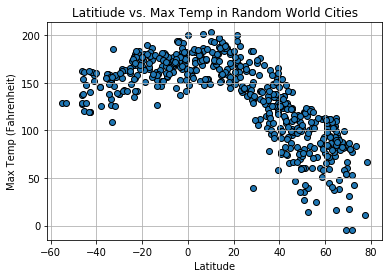

In [6]:
# Build a scatter plot for each data type
#convert all data from celcius to fahrenheit
weather_data1["max temp"] = weather_data1["max temp"] *(9/5) + 32
plt.scatter(weather_data1["lat"], weather_data1["max temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitiude vs. Max Temp in Random World Cities")
plt.ylabel("Max Temp (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/lat_vs_max_temp_cities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

In [17]:
#checking to see if there is an outlier for humidity data
weather_data1.sort_values(by=['humidity'], ascending=False).head()

#in this data, Paita has a humidity of 290, which isn't possible
#this will be ignored in the scatter plot with humidity

,city,cloudiness,country,date,humidity,lat,lng,max temp,wind speed
495,Paita,0,PE,1553630400,290,-5.09,-81.11,17.00,4.41
171,Tarakan,76,ID,1553633703,100,3.30,117.63,26.04,1.01
186,Nanortalik,64,GL,1553633782,100,60.14,-45.24,-4.07,12.21
498,Caravelas,0,BR,1553633885,100,-17.73,-39.27,27.99,4.41
109,Shingu,0,JP,1553633757,100,33.72,135.99,11.79,3.76


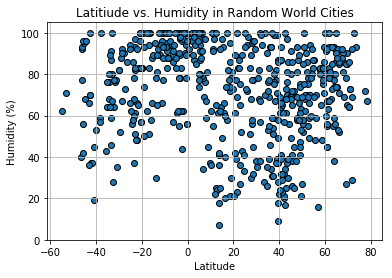

In [18]:
# Build a scatter plot
plt.scatter(weather_data1["lat"], weather_data1["humidity"], marker="o", edgecolors="black")

# graph labels
plt.title("Latitiude vs. Humidity in Random World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
#limit the y axis so it ignores any points past 100 humidity
plt.ylim(0, 105)

# Save the figure
plt.savefig("../output_data/humidity_in_cities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

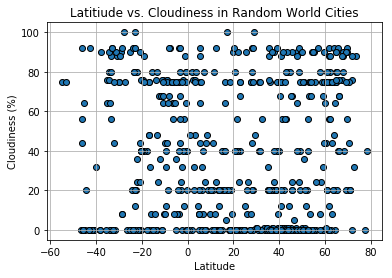

In [14]:
# Build a scatter plot 
plt.scatter(weather_data1["lat"], weather_data1["cloudiness"], marker="o", edgecolors="black")

# graph labels
plt.title("Latitiude vs. Cloudiness in Random World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Cloudiness_vs_temp_world_cites.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

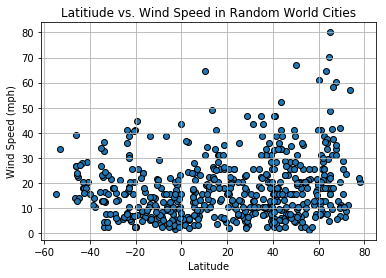

In [8]:
# Build a scatter plot for each data type
#convert windspeed from meters/sec to mph
weather_data1["wind speed"] = weather_data1["wind speed"] * 2.237
plt.scatter(weather_data1["lat"], weather_data1["wind speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitiude vs. Wind Speed in Random World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("latitude_vs_windspeed_cities.png")

# Show plot
plt.show()

In [ ]:
'''
what is the weather like as we approach the equator?
Based on the graphs
Max temperature is higher.
Humidity is about the same, with a slightly larger cluster by the equator.
Wind Speed is also about the same as humidity in its clustering.

'''